# Лекция 3: Ранг матрицы, аппроксимация низкого ранга, SVD

## Предыдущая лекция

- Пиковая производительность алгоритма
- Сложность алгоритмов умножения матриц
- Идея блочного разбиения (почему это хорошо?)

## Сегодняшняя лекция
- Ранг матрицы
- Скелетное разложение
- Аппроксимация низкого ранга
- Сингулярное разложение (SVD)
- Применения SVD

## Матрицы и линейные пространства
- Матрицу можно рассматривать как последовательность векторов, которые являются столбцами матрицы:

$$ A = [a_1, \ldots, a_m], $$

где $a_m \in \mathbb{C}^{n\times 1}$.  

- Произведение матрицы на вектор эквивалентно взятию линейной комбинации этих столбцов 

$$ y =  Ax \quad \Longleftrightarrow \quad y = a_1 x_1 + a_2 x_2 + \ldots +a_m x_m. $$

- Это частный случай **блочной матричной нотации** (столбцы также являются блоками), которую мы уже видели (разбиение на блоки для соответствия кэш-памяти, алгоритм Штрассена).

## Линейная зависимость

**Определение.** Векторы $a_i$ называются **линейно зависимыми**, если существуют одновременно ненулевые коэффициенты $x_i$ такие, что  

$$\sum_i a_i x_i = 0,$$

или в матричной форме

$$ Ax = 0, \quad \Vert x \Vert \ne 0. $$

В этом случае мы говорим, что матрица $A$ имеет нетривиальное **нуль-пространство** (или **ядро**), обозначаемое $N(A)$ (или $\text{ker}(A)$).

Векторы, которые не являются линейно зависимыми, называются **линейно независимыми**.

## Линейное (векторное) пространство
**Линейное пространство**, натянутое на векторы $\{a_1, \ldots, a_m\}$, определяется как множество всех возможных векторов вида 

$$ \mathcal{L}(a_1, \ldots, a_m) = \left\{y: y = \sum_{i=1}^m a_i x_i, \, \forall x_i, \, i=1,\dots, n \right\}, $$

В матричной форме линейное пространство - это множество всех $y$ таких, что 

$$y = A x.$$

Это множество также называется **областью значений** (или **образом**) матрицы, обозначаемой $\text{range}(A)$ (или $\text{im}(A)$) соответственно.


## Размерность линейного пространства

- Размерность линейного пространства $\text{im}(A)$, обозначаемая как $\text{dim}\, \text{im} (A)$, это минимальное количество векторов, необходимых для представления каждого вектора из $\text{im} (A)$.

- Размерность $\text{im}(A)$ имеет прямую связь с **рангом матрицы**.


## Ранг матрицы

- Ранг матрицы $A$ - это максимальное число линейно независимых *столбцов* в матрице $A$, или **размерность пространства столбцов** $= \text{dim} \, \text{im}(A)$.  

- Вы также можете использовать линейные комбинации *строк* для определения ранга, т.е. формально существуют два ранга: столбцовый ранг и строчный ранг матрицы.

**Теорема**  
Размерность пространства столбцов матрицы равна размерности пространства её строк.

[Доказательство](https://ocw.mit.edu/courses/mathematics/18-701-algebra-i-fall-2010/study-materials/MIT18_701F10_rrk_crk.pdf)

- В матричной форме этот факт можно записать как $\mathrm{dim}\ \mathrm{im} (A) = \mathrm{dim}\ \mathrm{im} (A^\top)$.

- Таким образом, существует единственный ранг!

## Матрица полного ранга

- Матрица $A \in \mathbb{R}^{m \times n}$ называется матрицей **полного ранга**, если $\mathrm{rank}(A) = \min(m, n)$.

Предположим, у нас есть линейное пространство, порожденное $n$ векторами.
Пусть эти векторы случайны, с элементами из стандартного нормального распределения $\mathcal{N}(0, 1)$.

**В**: Какова вероятность того, что это подпространство имеет размерность $m < n$?

**О**: Случайная матрица имеет полный ранг с вероятностью 1.

## Скелетное разложение

Очень полезным представлением для вычисления ранга матрицы является **скелетное разложение**, которое тесно связано с рангом.
Это разложение объясняет, почему и как матрицы низкого ранга могут быть сжаты.

Его можно графически представить следующим образом:  
<img src="./skeleton.png" width='90%'>
или в матричной форме

$$ A = C \widehat{A}^{-1} R, $$

где $C$ - это некоторые $k=\mathrm{rank}(A)$ столбцов матрицы $A$, $R$ - некоторые $k$ строк матрицы $A$, а $\widehat{A}$ - **невырожденная** подматрица на их пересечении.

### Замечание

Мы еще формально не определили обратную матрицу, поэтому напомним:

- Обратной матрицей для матрицы $P$ является матрица $Q = P^{-1}$ такая, что $P Q = QP = I$.
- Если матрица квадратная и имеет полный ранг, то обратная матрица существует.

### Доказательство скелетного разложения
* Пусть $C\in \mathbb{C}^{n\times k}$ - это $k$ столбцов, основанных на невырожденной подматрице $\widehat{A}$. Следовательно, они линейно независимы.
* Возьмем любой другой столбец $a_i$ матрицы $A$. Тогда $a_i$ можно представить как линейную комбинацию столбцов $C$, т.е. $a_i = C x_i$, где $x_i$ - вектор коэффициентов.

* $a_i = C x_i$ - это $n$ уравнений. Мы берем $k$ уравнений из них, соответствующих строкам, содержащим $\widehat{A}$, и получаем уравнение

$$\widehat{r}_i = \widehat{A} x_i \quad \Longrightarrow \quad x_i = \widehat{A}^{-1} \widehat r_i$$

Таким образом, $a_i = C\widehat{A}^{-1} \widehat r_i$ для каждого $i$ и

$$A = [a_1,\dots, a_m] = C\widehat{A}^{-1} R.$$

### Более подробный взгляд на скелетное разложение

- Любая матрица ранга $r$ может быть записана в форме

$$A = C \widehat{A}^{-1} R,$$

где $C$ имеет размер $n \times r$, $R$ имеет размер $r \times m$ и $\widehat{A}$ имеет размер $r \times r$, или 

$$ A = UV, $$

где $U$ и $V$ не являются уникальными, например, $U = C \widehat{A}^{-1}$, $V=R$.

- Форма $A = U V$ является стандартной для скелетного разложения.

- Таким образом, каждая матрица ранга $r$ может быть записана как произведение "тонкой" ("высокой") матрицы $U$ на "широкую" ("короткую") матрицу $V$.

В индексной форме это

$$ a_{ij} = \sum_{\alpha=1}^r u_{i \alpha} v_{\alpha j}. $$

Для ранга 1 имеем

$$ a_{ij} = u_i v_j, $$

т.е. это разделение индексов, и матрица ранга $r$ является суммой матриц ранга $1$!

### Хранение
Интересно отметить, что для матрицы ранга $r$ 

$$A = U V$$

можно хранить только $U$ и $V$, что дает нам $(n+m) r$ параметров, поэтому это может использоваться для сжатия. Мы также можем вычислять произведение матрицы на вектор $Ax$ гораздо быстрее:

* Умножение $y = Vx$ требует $\mathcal{O}(mr)$ операций.
* Умножение $z = Uy$ требует $\mathcal{O}(nr)$ операций.

То же самое работает для сложения, поэлементного умножения и т.д.
Для сложения:

$$    A_1 + A_2 = U_1 V_1 + U_2 V_2 = [U_1|U_2] [V_1^\top|V_2^\top]^\top $$

In [1]:
#A fast matrix-by-vector product demo
import numpy as np
n = 4096
r = 10
u = np.random.normal(size=(n, r))
v = np.random.normal(size=(n, r))
a = u @ v.T
x = np.random.normal(size=(n,))
print(n*n/(2*n*r))
%timeit a @ x
%timeit u @ (v.T @ x)

204.8
2.32 ms ± 101 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
29.5 μs ± 73.5 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Computing matrix rank
We can also try to compute the matrix rank using the built-in ```jnp.linalg.matrix_rank``` function

In [2]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-8 * np.random.randn(*a.shape)
print('Rank of the matrix:', np.linalg.matrix_rank(b, tol=1e-7))

Rank of the matrix: 1
Rank of the matrix: 9


<font color='red'> Таким образом, малые возмущения могут существенно влиять на ранг! </font>

### Неустойчивость ранга матрицы
Для любой матрицы $A$ ранга $r$ с $r < \min(m, n)$ существует матрица $B$ такая, что ее ранг равен $\min(m, n)$ и

$$ \Vert A - B \Vert = \epsilon. $$

**Вопрос**: Означает ли это, что численно ранг матрицы не имеет смысла? (То есть, малые возмущения приводят к полному рангу!)

**Ответ**: Нет. Мы должны найти матрицу $B$ такую, что $\|A-B\| = \epsilon$ и $B$ имеет минимальный ранг. Поэтому мы можем вычислить ранг только с заданной точностью $\epsilon$.
Одним из подходов к вычислению ранга матрицы $r$ является SVD.

## Аппроксимация низкого ранга

Важной задачей во многих приложениях является нахождение аппроксимации низкого ранга для заданной матрицы с заданной точностью $\epsilon$ или рангом $r$. <br>
Примеры:
* анализ главных компонент
* рекомендательные системы
* метод наименьших квадратов
* сжатие нейронных сетей

Эти задачи могут быть решены с помощью SVD.

## Сингулярное разложение
Для вычисления аппроксимации низкого ранга нам необходимо вычислить **сингулярное разложение** (SVD).

**Теорема** Любая матрица $A\in \mathbb{C}^{n\times m}$ может быть представлена как произведение трех матриц:  

$$ A = U \Sigma V^*, $$

где 
- $U$ - унитарная матрица размера $n \times K$, 
- $V$ - унитарная матрица размера $m \times K$, $K = \min(m, n)$,
- $\Sigma$ - диагональная матрица с неотрицательными элементами $\sigma_1 \geq  \ldots, \geq \sigma_K$ на диагонали. 
- Более того, если $\text{rank}(A) = r$, то $\sigma_{r+1} = \dots = \sigma_K = 0$.

### Доказательство
* Матрица $A^*A$ является эрмитовой, следовательно, диагонализируема в унитарном базисе (будет обсуждаться далее в курсе).
* $A^*A\geq0$ (неотрицательно определена), поэтому собственные значения неотрицательны.
Следовательно, существует унитарная матрица $V = [v_1, \dots, v_n]$ такая, что

$$ V^* A^* A V = \text{diag}(\sigma_1^2,\dots, \sigma_n^2), \quad \sigma_1\geq \sigma_2\geq \dots \geq \sigma_n. $$

Пусть $\sigma_i = 0$ для $i>r$, где $r$ - некоторое целое число. <br>
Пусть $V_r= [v_1, \dots, v_r]$, $\Sigma_r = \text{diag}(\sigma_1, \dots,\sigma_r)$. Следовательно

$$ V^*_r A^* A V_r = \Sigma_r^2 \quad \Longrightarrow \quad (\Sigma_r^{-1} V_r^* A^*) (A V_r\Sigma_r^{-1} ) = I. $$

В результате, матрица $U_r = A V_r\Sigma_r^{-1}$ удовлетворяет $U_r^* U_r = I$ и, следовательно, имеет ортогональные столбцы. <br>
Добавим к $U_r$ любые ортогональные столбцы, которые ортогональны столбцам в $U_r$, и обозначим эту матрицу как $U$.
Тогда

$$ AV = U \begin{bmatrix} \Sigma_r & 0 \\ 0 & 0 \end{bmatrix}\quad \Longrightarrow \quad U^* A V = \begin{bmatrix}\Sigma_r & 0 \\ 0 & 0 \end{bmatrix}.
$$

Поскольку умножение на невырожденные матрицы не меняет ранг $A$, мы имеем $r = \text{rank}(A)$.

**Следствие 1**: $A = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_\alpha v_\alpha^*$ или поэлементно $a_{ij} = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_{i\alpha} \overline{v}_{j\alpha}$

**Следствие 2**: $$\text{ker}(A) = \mathcal{L}\{v_{r+1},\dots,v_n\}$$

$$\text{im}(A) = \mathcal{L}\{u_{1},\dots,u_r\}$$

$$\text{ker}(A^*) = \mathcal{L}\{u_{r+1},\dots,u_n\}$$

$$\text{im}(A^*) = \mathcal{L}\{v_{1},\dots,v_r\}$$

## Теорема Экарта-Янга

Наилучшее приближение низкого ранга может быть вычислено с помощью SVD.

**Теорема:** Пусть $r < \text{rank}(A)$, $A_r = U_r \Sigma_r V_r^*$. Тогда

$$ \min_{\text{rank}(B)=r} \|A - B\|_2 = \|A - A_r\|_2 = \sigma_{r+1}. $$

То же самое верно для $\|\cdot\|_F$, но $\|A - A_r\|_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{\min (n,m)}^2}$.

## Доказательство  

- Поскольку $\text{rank} (B) = r$, то $\text{dim}~\text{ker}~B = n-r$. 
- Следовательно, существует $z\not=0$ такой, что $z\in \text{ker}(B) \cap \mathcal{L}(v_1,\dots,v_{r+1})$ (так как $\text{dim}\{v_1,\dots,v_{r+1}\} = r+1$).
- Зафиксируем $\|z\| = 1$. Тогда,

$$ \|A-B\|_2^2 \geq \|(A-B)z\|_2^2 = \|Az\|_2^2 = \| U\Sigma V^* z\|^2_2= \|\Sigma V^* z\|^2_2 = \sum_{i=1}^{n} \sigma_i^2 (v_i^*z)^2 =\sum_{i=1}^{r+1} \sigma_i^2 (v_i^*z)^2 \geq \sigma_{r+1}^2\sum_{i=1}^{r+1} (v_i^*z)^2 = \sigma_{r+1}^2 $$

так как $\sigma_1\geq \dots \geq \sigma_{r+1}$ и $$\sum_{i=1}^{r+1} (v_i^*z)^2 = \|V^*z\|_2^2 = \|z\|_2^2 = 1.$$

## Основной результат о приближении низкого ранга

**Следствие:** вычисление наилучшего приближения ранга $r$ эквивалентно установке $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$. Ошибка 

$$ \min_{A_r} \Vert A - A_r \Vert_2 = \sigma_{r+1}, \quad \min_{A_r} \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2} $$

вот почему важно смотреть на скорость убывания сингулярных значений.

## Вычисление SVD

- Алгоритмы для вычисления SVD сложны и будут обсуждаться позже.

- Но для численных расчетов мы уже можем использовать NumPy, JAX или PyTorch!

Вернемся к предыдущему примеру

In [3]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-5 * np.random.randn(*a.shape)
print('Rank of the matrix:', np.linalg.matrix_rank(b, tol=1e-7))

Rank of the matrix: 1
Rank of the matrix: 50


In [4]:
u, s, v = np.linalg.svd(b) #b = u@jnp.diag(s)@v 
print(s/s[0])
print(s[1]/s[0])
r = 1
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
a1 = u1.dot(np.diag(s1).dot(v1))
print(np.linalg.norm(b - a1, 2)/s[0])

[1.00000000e+00 2.67591794e-06 2.56509433e-06 2.44789428e-06
 2.37455067e-06 2.29593994e-06 2.28815285e-06 2.23799065e-06
 2.05935979e-06 2.03632846e-06 1.99639422e-06 1.91341245e-06
 1.83976105e-06 1.81660880e-06 1.74749549e-06 1.73011845e-06
 1.64795628e-06 1.58936685e-06 1.52344312e-06 1.46849377e-06
 1.41976378e-06 1.36738146e-06 1.32423364e-06 1.25094325e-06
 1.20823796e-06 1.16024742e-06 1.08756172e-06 9.81247385e-07
 9.32616886e-07 9.20283514e-07 8.93963429e-07 8.53777806e-07
 8.01564035e-07 7.62399924e-07 7.12964817e-07 6.77836503e-07
 6.64178420e-07 5.63347485e-07 5.17310367e-07 4.72905832e-07
 4.24444379e-07 3.68835674e-07 3.07482216e-07 2.90162960e-07
 2.44707429e-07 2.04581052e-07 1.82253444e-07 8.90398610e-08
 7.58352672e-08 1.85055347e-08]
2.675917943198842e-06
2.6759179431971288e-06


-3.141592653589793


array([2.78854542e+00, 1.20190215e+00, 3.30044974e-01, 7.54479752e-02,
       1.55399551e-02, 2.95394532e-03, 5.24245757e-04, 8.75037081e-05,
       1.38080403e-05, 2.06801794e-06, 2.94871204e-07, 4.01282821e-08,
       5.22283426e-09, 6.51260216e-10, 7.79183059e-11, 8.95604200e-12,
       9.90072462e-13, 1.05370075e-13, 1.08052502e-14, 1.07049842e-15,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
       2.21741581e-16, 2.21741581e-16, 2.21741581e-16, 2.21741581e-16,
      

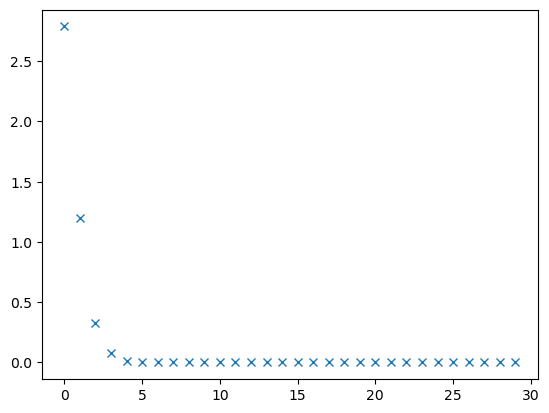

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc("text", usetex=False)

n = 100
a = [[1.0/(i+j+0.5) for i in range(n)] for j in range(n)] #Hilbert matrix 
da = np.array(a)
u, s, v = np.linalg.svd(a)
print(s[50] - np.pi)
plt.plot(s[:30], 'x')
s
#plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
#plt.xlabel(r"Singular value index, $i$", fontsize=24)
# plt.grid(True)
# plt.xticks(fontsize=26)
# plt.yticks(fontsize=26)
# #We have very good low-rank approximation of it!

## Линейный факторный анализ и низкий ранг
Рассмотрим линейную факторную модель, 

$$y = Ax, $$ 

где $y$ - вектор длины $n$, а $x$ - вектор длины $r$.  
Данные организованы в виде выборок: мы наблюдаем векторы  

$$y_1, \ldots, y_T,$$

но не знаем матрицу $A$,
тогда факторная модель может быть записана как  

$$
  Y = AX,
$$

где $Y$ имеет размер $n \times T$, $A$ имеет размер $n \times r$ и $X$ имеет размер $r \times T$. 

- Это в точности модель ранга $r$: она говорит нам, что векторы лежат в малом подпространстве.
- Мы также можем использовать SVD для восстановления этого подпространства (но не независимых компонент). 
- Анализ главных компонент может быть выполнен с помощью SVD, посмотрите реализацию в [пакете sklearn](https://github.com/scikit-learn/scikit-learn/blob/0d378913be6d7e485b792ea36e9268be31ed52d0/sklearn/decomposition/_pca.py#L465).

## Применения SVD

- SVD чрезвычайно важен в вычислительной науке и инженерии.

- Он имеет много названий: Анализ главных компонент, Правильное ортогональное разложение, Эмпирические ортогональные функции

- Теперь мы рассмотрим сжатие **плотных** матриц и метод активных подпространств

## Сжатие плотных матриц
 
 Плотные матрицы обычно требуют хранения $N^2$ элементов. Аппроксимация ранга-$r$ может уменьшить это число до $\mathcal{O}(Nr)$

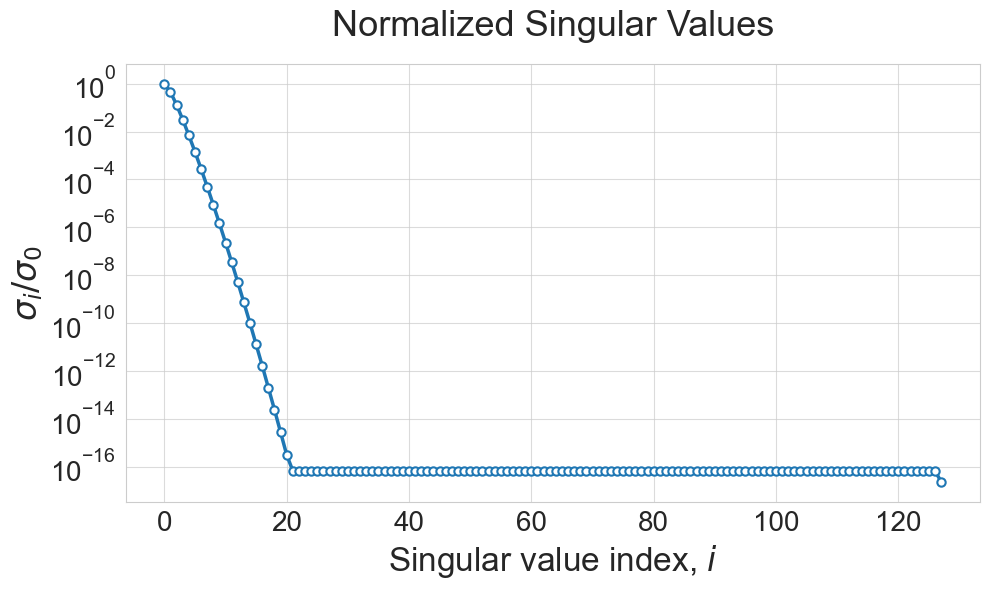

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a more beautiful plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Generate the matrix
n = 256
a = [[1.0/(i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)

# Compute SVD
u, s, v = np.linalg.svd(a[n//2:, :n//2])

# Plot singular values
plt.semilogy(s/s[0], linewidth=2.5, color='#1f77b4', marker='o', markersize=6, 
             markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#1f77b4')

# Add labels and customize
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)
plt.grid(True, alpha=0.7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add title and improve appearance
plt.title("Normalized Singular Values", fontsize=26, pad=20)
plt.tight_layout()

# Add a box around the plot
plt.box(True)

## Сжатие параметров в полносвязных нейронных сетях

- Одним из основных строительных блоков современных глубоких нейронных сетей является **полносвязный слой**, также известный как **линейный слой**
- Этот слой реализует действие линейной функции на входной вектор: $f(x) = Wx + b$, где $W$ - обучаемая матрица, а $b$ - обучаемый вектор смещения
- И $W$, и $b$ обновляются во время обучения сети в соответствии с некоторым методом оптимизации, например, SGD, Adam и т.д.
- Однако хранение обученных оптимальных параметров ($W$ и $b$) может быть **непозволительно затратным**, если вы хотите перенести вашу обученную сеть на устройство с ограниченной памятью
- В качестве возможного решения вы можете **сжать** матрицы $W_i$ из $i$-го линейного слоя с помощью усеченного SVD на основе сингулярных значений!
- Что вы получаете после такой аппроксимации $W$?
    - эффективное использование памяти при хранении
    - более быстрый вывод
    - умеренное снижение точности при решении целевой задачи, например, классификации изображений

## Take home message
- Matrix rank definition
- Skeleton approximation and dyadic representation of a rank-$r$ matrix
- Singular value decomposition and Eckart-Young theorem
- Three applications of SVD (linear factor analysis, dense matrix compression, active subspaces).

## Next lecture
- Linear systems
- Inverse matrix
- Condition number
- Linear least squares
- Pseudoinverse

##### Questions?

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()